In [1]:
import yaml
import numpy as np
import pandas as pd
from matplotlib import pyplot
from magicctapipe.scripts import stereo_reco

In [2]:
# --- display all columns --- 
pd.set_option('display.max_columns', None)

# --- customize pyplot figure ---
pyplot.rcParams['figure.figsize'] = (12, 9)
pyplot.rcParams['font.size'] = 15
pyplot.rcParams['grid.linestyle'] = ':'

# --- get the default color cycle ---
color_cycle = pyplot.rcParams['axes.prop_cycle'].by_key()['color']

# Settings

In [3]:
input_file = '/fefs/aswg/workspace/analysis-school-2022/lst1_magic/dl1_lst1_magic_run03265.0040.h5'

In [4]:
output_file = './dl1_stereo_lst1_magic_run03265.0040.h5'

In [5]:
config_file = './config.yaml'

with open(config_file, 'rb') as f:
    config = yaml.safe_load(f)

In [6]:
config['stereo_reco']

{'quality_cuts': '(intensity > 50) & (width > 0)'}

# Process the input data

In [7]:
stereo_reco(input_file, output_file, config)


Loading the input data file:
/fefs/aswg/workspace/analysis-school-2022/lst1_magic/dl1_lst1_magic_run03265.0040.h5

In total 1827 stereo events:
m1_m2: 316 events (17.3%)
lst1_m1: 79 events (4.3%)
lst1_m2: 208 events (11.4%)
lst1_m1_m2: 1224 events (67.0%)

Subarray configuration:
Telescope 1: LST, position = [-8.09 77.13  0.78] m
Telescope 2: MAGIC, position = [ 39.3  -62.55  -0.97] m
Telescope 3: MAGIC, position = [-31.21 -14.57   0.2 ] m

Checking the angular separation of LST-1 and MAGIC pointing directions...
--> Maximum angular separation is 0.426 arcmin. Continue.

Applying the following quality cuts:
(intensity > 50) & (width > 0)

In total 1610 stereo events:
m1_m2: 208 events (12.9%)
lst1_m1: 151 events (9.4%)
lst1_m2: 325 events (20.2%)
lst1_m1_m2: 926 events (57.5%)

Reconstructing the stereo parameters...
0 events
100 events
200 events
300 events
400 events
500 events
600 events
700 events
800 events
900 events
1000 events
1100 events
1200 events
1300 events
1400 events
15

# Check the output data

In [8]:
data = pd.read_hdf(output_file, key='events/params')
data.set_index(['obs_id', 'event_id', 'tel_id'], inplace=True)
data.sort_index(inplace=True)

In [9]:
data.head(10)

obs_id_lst  event_id_lst    intensity         x  \
obs_id  event_id tel_id                                                    
5093711 76344    2              NaN           NaN    70.200976 -0.223957   
                 3              NaN           NaN    74.312500 -0.107275   
        76345    1           3265.0     2120035.0   169.430605 -0.071064   
                 2              NaN           NaN   130.000000  0.028855   
                 3              NaN           NaN   112.401042 -0.043045   
        76346    1           3265.0     2120050.0  1315.858954  0.034456   
                 2              NaN           NaN   123.957031  0.004482   
                 3              NaN           NaN   176.835938  0.009097   
        76347    2              NaN           NaN    52.109375  0.183424   
                 3              NaN           NaN    65.992188 -0.037027   

                                y         r         phi    length     width  \
obs_id  event_id tel_id                                                       
5093711 76344    2      -0.105213  0.247440 -154.836178  0.031845  0.013492   
                 3       0.264665  0.285580  112.063916  0.025185  0.017131   
        76345    1       0.042055  0.082575  149.383378  0.039634  0.023464   
                 2      -0.021926  0.036241  -37.230119  0.082103  0.023619   
                 3       0.002628  0.043125  176.506871  0.080488  0.014664   
        76346    1       0.240265  0.242723   81.838955  0.266748  0.167507   
                 2       0.061934  0.062096   85.860524  0.177439  0.064504   
                 3       0.070195  0.070782   82.615859  0.134871  0.086434   
        76347    2       0.168197  0.248866   42.520373  0.018756  0.012734   
                 3      -0.073436  0.082243 -116.757453  0.021237  0.016089   

                               psi  skewness  kurtosis      slope  intercept  \
obs_id  event_id tel_id                                                        
5093711 76344    2      -76.522975 -0.104281  2.004080  -3.467450  24.622008   
                 3      -85.021328  0.333280  2.176815 -21.548397  25.798995   
        76345    1      -68.351884 -0.302409  3.271540  -9.059055  17.696285   
                 2       80.209317 -0.422864  1.547722   6.036241  21.421722   
                 3       -8.534323 -0.558910  1.595304  17.973012  22.793388   
        76346    1      -22.395284  0.420115  1.430736 -14.355683  23.699092   
                 2       59.431907 -0.410988  1.603990   4.548442  25.425418   
                 3       70.016068 -0.566682  1.856647  -0.627571  29.918188   
        76347    2       80.024583  0.205915  2.051027  13.243040  25.918538   
                 3       17.081865 -0.751384  3.881297 -51.603865  28.270839   

                         intensity_width_1  intensity_width_2  pixels_width_1  \
obs_id  event_id tel_id                                                         
5093711 76344    2                     0.0                0.0             0.0   
                 3                     0.0                0.0             0.0   
        76345    1                     0.0                0.0             0.0   
                 2                     0.0                0.0             0.0   
                 3                     0.0                0.0             0.0   
        76346    1                     0.0                0.0             0.0   
                 2                     0.0                0.0             0.0   
                 3                     0.0                0.0             0.0   
        76347    2                     0.0                0.0             0.0   
                 3                     0.0                0.0             0.0   

                         pixels_width_2  n_pixels  n_islands   alt_tel  \
obs_id  event_id tel_id                                                  
5093711 76344    2                  0.0         9          1  0.720401   
       

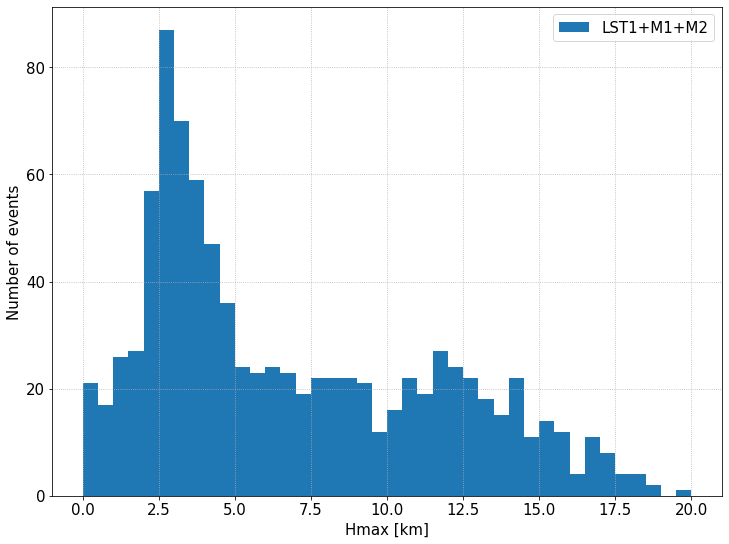

In [10]:
pyplot.figure()
pyplot.xlabel('Hmax [km]')
pyplot.ylabel('Number of events')

m2km = 1e-3
    
df = data.query(f'multiplicity == 3').groupby(['obs_id', 'event_id']).mean()

pyplot.hist(
    df['h_max'].to_numpy() * m2km, bins=np.linspace(0, 20, 41), label='LST1+M1+M2'
)
    
pyplot.legend()
pyplot.grid()